In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

In [3]:
# Load data
df = pd.read_csv("data/ESS11.csv", sep=";", encoding="utf-8",
                usecols=["idno", "respc19a", "vacc19",	"cntry",
                        "eisced","hinctnta", "hhmmb", "netusoft",
                        "gndr", "maritalb", "domicil", "agea", "trstprl",
                        "trstlgl", "trstplc", "trstplt", "trstprt"])

In [4]:
# Show basic structure
print("Shape of the data:", df.shape)

Shape of the data: (46162, 17)


In [5]:
# Display first five rows
df

,idno,respc19a,vacc19,cntry,eisced,hinctnta,hhmmb,netusoft,gndr,maritalb,domicil,agea,trstprl,trstlgl,trstplc,trstplt,trstprt
0,50014,1.0,1.0,AT,3.0,6.0,2.0,5.0,1,1.0,3.0,65.0,6.0,9.0,10.0,5.0,5.0
1,50030,1.0,1.0,AT,5.0,1.0,1.0,5.0,2,6.0,1.0,21.0,6.0,6.0,4.0,1.0,0.0
2,50057,1.0,1.0,AT,6.0,5.0,3.0,5.0,2,1.0,3.0,53.0,7.0,5.0,8.0,4.0,4.0
3,50106,1.0,1.0,AT,5.0,2.0,1.0,1.0,2,4.0,1.0,78.0,5.0,6.0,9.0,3.0,3.0
4,50145,3.0,1.0,AT,3.0,NaN,2.0,5.0,1,1.0,4.0,64.0,6.0,8.0,8.0,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46157,86379,1.0,1.0,SK,2.0,5.0,3.0,5.0,1,6.0,4.0,18.0,4.0,5.0,10.0,3.0,3.0
46158,86407,3.0,1.0,SK,4.0,7.0,2.0,2.0,1,1.0,1.0,56.0,4.0,7.0,10.0,4.0,6.0
46159,86408,1.0,1.0,SK,7.0,10.0,3.0,5.0,2,1.0,4.0,31.0,5.0,4.0,5.0,5.0,5.0
46160,86426,3.0,2.0,SK,1.0,NaN,7.0,5.0,1,6.0,4.0,15.0,0.0,5.0,2.0,3.0,NaN


In [6]:
df.isna().sum()

idno           0
respc19a     540
vacc19       342
cntry          0
eisced       188
hinctnta    9847
hhmmb        327
netusoft      42
gndr           0
maritalb     743
domicil      101
agea         357
trstprl      916
trstlgl      976
trstplc      451
trstplt      698
trstprt      840
dtype: int64

In [7]:
df = df[df['cntry'] == 'ES']
print("Length of the Spain data:", df.shape)
df.isna().sum()

Length of the Spain data: (1844, 17)


idno          0
respc19a      8
vacc19        4
cntry         0
eisced        6
hinctnta    297
hhmmb         4
netusoft      0
gndr          0
maritalb      8
domicil       3
agea          9
trstprl      49
trstlgl      26
trstplc       3
trstplt      15
trstprt      20
dtype: int64

Dependent variable encoding

The variable vacc19 tells us whether someone has received at least one COVID-19 vaccination dose. People could answer:

1 = Yes

2 = No

7 = Refusal to answer

8 = Don’t know

9 = No answer

Since we want to model who actually got vaccinated versus who did not, it makes sense to treat:

1 → vaccinated (coded as 1)

2 → not vaccinated (coded as 0)

The other responses (7, 8, 9) do not give us any meaningful information. They just mean the person refused, didn’t know, or skipped the question. Therefore, we should treat them as missing values and remove those rows from the analysis.

In simple words, if people refused to answer, we cannot know their vaccination status — so we have to drop those rows.

In [8]:
# Recode vacc19
df = df[df['vacc19'].isin([1, 2])]  # keep only valid responses
df['vacc19_binary'] = df['vacc19'].map({1: 1, 2: 0})

Research Question:
Which demographic, socioeconomic, and attitudinal factors influenced COVID-19 vaccination uptake in Germany in 2023?

In [9]:
# Recode respc19a as binary (1 = ever infected, 0 = never infected)
df = df[df['respc19a'].isin([1, 2, 3])]
df['respc19a_binary'] = df['respc19a'].map({1: 1, 2: 1, 3: 0})

In [10]:
df['gndr'] = df['gndr'].replace({1: 0, 2: 1})

In [11]:
df

,idno,respc19a,vacc19,cntry,eisced,hinctnta,hhmmb,netusoft,gndr,maritalb,domicil,agea,trstprl,trstlgl,trstplc,trstplt,trstprt,vacc19_binary,respc19a_binary
10676,50017,1.0,1.0,ES,2.0,7.0,3.0,5.0,1,6.0,1.0,45.0,4.0,2.0,5.0,4.0,3.0,1,1
10677,50032,3.0,1.0,ES,6.0,10.0,2.0,5.0,0,6.0,1.0,64.0,10.0,8.0,9.0,7.0,6.0,1,0
10678,50033,3.0,1.0,ES,2.0,1.0,2.0,5.0,1,6.0,1.0,53.0,6.0,7.0,7.0,5.0,5.0,1,0
10679,50037,3.0,1.0,ES,1.0,NaN,4.0,5.0,0,1.0,4.0,43.0,5.0,2.0,10.0,0.0,0.0,1,0
10680,50052,1.0,1.0,ES,2.0,3.0,2.0,5.0,0,6.0,4.0,32.0,0.0,2.0,2.0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12515,86378,1.0,1.0,ES,7.0,9.0,3.0,5.0,1,1.0,4.0,49.0,0.0,3.0,10.0,0.0,0.0,1,1
12516,86379,3.0,1.0,ES,2.0,5.0,4.0,4.0,0,1.0,1.0,49.0,5.0,5.0,8.0,2.0,2.0,1,0
12517,86394,1.0,1.0,ES,4.0,3.0,2.0,5.0,1,6.0,4.0,32.0,5.0,3.0,0.0,0.0,0.0,1,1
12518,86402,1.0,1.0,ES,5.0,8.0,2.0,5.0,0,1.0,4.0,51.0,0.0,5.0,10.0,0.0,0.0,1,1


In [12]:
# -----------------------------------------
# 1. Variables with missing codes {7, 8, 9}
# -----------------------------------------
vars_789 = ['netusoft', 'domicil']
for var in vars_789:
    df = df[~df[var].isin([7,8,9])]

# -----------------------------------------
# 2. Variables with missing codes {77, 88, 99}
# -----------------------------------------
vars_778899 = ['maritalb', 'hinctnta', 'hhmmb',
            'trstprl', 'trstlgl', 'trstplc', 'trstplt', 'trstprt']
for var in vars_778899:
    df = df[~df[var].isin([77,88,99])]

# -----------------------------------------
# 3. Variables with missing codes {7, 8, 9, 77, 88, 99}
# (if any variable had all of these, we could use this, but none does here)
# so we skip this group for now

# -----------------------------------------
# 4. Variables with specific missing codes
# -----------------------------------------

# gender (only 9 means missing)
df = df[df['gndr'] != 9]

# education level (more specific)
df = df[~df['eisced'].isin([55,77,88,99])]

# age (999 means missing)
df = df[df['agea'] != 999]

# country does not need cleaning (mandatory)

# -----------------------------------------
# show cleaned data
# -----------------------------------------
df

,idno,respc19a,vacc19,cntry,eisced,hinctnta,hhmmb,netusoft,gndr,maritalb,domicil,agea,trstprl,trstlgl,trstplc,trstplt,trstprt,vacc19_binary,respc19a_binary
10676,50017,1.0,1.0,ES,2.0,7.0,3.0,5.0,1,6.0,1.0,45.0,4.0,2.0,5.0,4.0,3.0,1,1
10677,50032,3.0,1.0,ES,6.0,10.0,2.0,5.0,0,6.0,1.0,64.0,10.0,8.0,9.0,7.0,6.0,1,0
10678,50033,3.0,1.0,ES,2.0,1.0,2.0,5.0,1,6.0,1.0,53.0,6.0,7.0,7.0,5.0,5.0,1,0
10679,50037,3.0,1.0,ES,1.0,NaN,4.0,5.0,0,1.0,4.0,43.0,5.0,2.0,10.0,0.0,0.0,1,0
10680,50052,1.0,1.0,ES,2.0,3.0,2.0,5.0,0,6.0,4.0,32.0,0.0,2.0,2.0,0.0,0.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12515,86378,1.0,1.0,ES,7.0,9.0,3.0,5.0,1,1.0,4.0,49.0,0.0,3.0,10.0,0.0,0.0,1,1
12516,86379,3.0,1.0,ES,2.0,5.0,4.0,4.0,0,1.0,1.0,49.0,5.0,5.0,8.0,2.0,2.0,1,0
12517,86394,1.0,1.0,ES,4.0,3.0,2.0,5.0,1,6.0,4.0,32.0,5.0,3.0,0.0,0.0,0.0,1,1
12518,86402,1.0,1.0,ES,5.0,8.0,2.0,5.0,0,1.0,4.0,51.0,0.0,5.0,10.0,0.0,0.0,1,1


When some people do not report their household income, it is like a blank spot in the survey. If you simply throw away all those people, you might lose a lot of data (10% in this case). But you also do not want to just make up random numbers.

Using the median to fill in those blanks is reasonable because: a. the median is the “middle” income group, so it is robust to extremely rich or poor people; b. it does not get pulled upward or downward by outliers; c. it gives you a realistic estimate for someone “typical” in the sample

So you are filling in the blanks with a “middle of the road” reasonable value that will not distort your model too much.

In [13]:
df.isnull().sum()

idno                 0
respc19a             0
vacc19               0
cntry                0
eisced               6
hinctnta           293
hhmmb                4
netusoft             0
gndr                 0
maritalb             8
domicil              2
agea                 9
trstprl             49
trstlgl             26
trstplc              3
trstplt             15
trstprt             20
vacc19_binary        0
respc19a_binary      0
dtype: int64

In [14]:
df['hinctnta'] = df['hinctnta'].fillna(df['hinctnta'].median())

In [15]:
df = df.dropna()

In [16]:
df.isnull().sum()

idno               0
respc19a           0
vacc19             0
cntry              0
eisced             0
hinctnta           0
hhmmb              0
netusoft           0
gndr               0
maritalb           0
domicil            0
agea               0
trstprl            0
trstlgl            0
trstplc            0
trstplt            0
trstprt            0
vacc19_binary      0
respc19a_binary    0
dtype: int64

In [17]:
df.to_csv("data/ESS11_es_cleaned.csv", index=False, sep=";")

Question 4: linear combination check

In [18]:
ctab = None

In [19]:
# check cross-tabulations for each categorical variable before fitting:
for var in ['gndr', 'maritalb', 'domicil', 'cntry', 'eisced', "respc19a_binary",
            "trstprl", "trstlgl", "trstplc", "trstplt", "trstprt"]:
    ctab = pd.crosstab(df[var], df['vacc19_binary'])
    print(f"\nCross-tabulation for {var}:\n", ctab)



Cross-tabulation for gndr:
 vacc19_binary   0    1
gndr                  
0              41  794
1              26  881

Cross-tabulation for maritalb:
 vacc19_binary   0    1
maritalb              
1.0            22  844
3.0             1   30
4.0             3  104
5.0             2  102
6.0            39  595

Cross-tabulation for domicil:
 vacc19_binary   0    1
domicil               
1.0            12  364
2.0            10  121
3.0            15  467
4.0            28  704
5.0             2   19

Cross-tabulation for cntry:
 vacc19_binary   0     1
cntry                  
ES             67  1675

Cross-tabulation for eisced:
 vacc19_binary   0    1
eisced                
1.0            12  310
2.0            27  420
3.0             5  192
4.0             6  106
5.0            10  183
6.0             1  179
7.0             6  285

Cross-tabulation for respc19a_binary:
 vacc19_binary     0     1
respc19a_binary          
0                29   607
1                38  1068

Cross-t

Excluding the "trst-" predictors as some of those provide perfect separation
whereas those which do not provide perfect separation, provide very little evidences which
might lead to bias towards one prediction

check if non-linearity exists

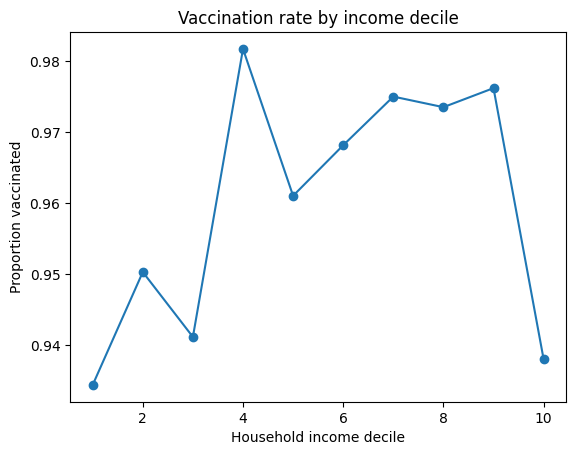

In [20]:
# get vaccination rate by income decile
vacc_rates = df.groupby('hinctnta')['vacc19_binary'].mean()

# plot
plt.plot(vacc_rates.index, vacc_rates.values, marker='o')
plt.xlabel('Household income decile')
plt.ylabel('Proportion vaccinated')
plt.title('Vaccination rate by income decile')
plt.show()


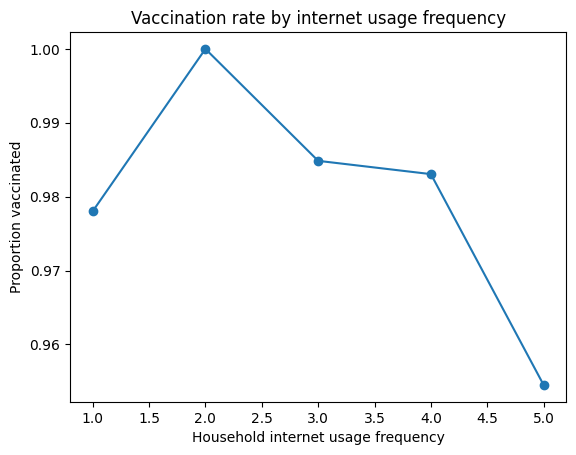

In [21]:
# get vaccination rate by income decile
vacc_rates = df.groupby('netusoft')['vacc19_binary'].mean()

# plot
plt.plot(vacc_rates.index, vacc_rates.values, marker='o')
plt.xlabel('Household internet usage frequency')
plt.ylabel('Proportion vaccinated')
plt.title('Vaccination rate by internet usage frequency')
plt.show()


Unlike Germany here only trstprl will stay as for the other trst- variables, there exist values which 
perfectly separates the dependent variable outcome

In [22]:
# Assuming df is still loaded from previous cleaning steps

# Redefine the list of predictors
predictors = [
    'agea',
    'respc19a_binary',
    'hinctnta',
    'hhmmb',
    'netusoft',
    'gndr',
    'trstprl'
]

In [23]:
# Dummy code relevant categorical variables
df = pd.get_dummies(df, columns=['maritalb', 'domicil', 'eisced'], drop_first=True)

# Add all dummies to predictors
predictors += [col for col in df.columns if any(x in col for x in ['maritalb_', 'domicil_', 'eisced_'])]

print("Predictors after dummy coding:\n", predictors)
# Make sure there are no non-numeric columns:
for col in predictors:
    df[col] = pd.to_numeric(df[col], errors="coerce")

# # Remove any rows with NA (if missing)
# df_model = df.dropna(subset=predictors + ['vacc19_binary'])
# Drop missing rows
df_model = df.dropna(subset=predictors + ['vacc19_binary'])

Predictors after dummy coding:
 ['agea', 'respc19a_binary', 'hinctnta', 'hhmmb', 'netusoft', 'gndr', 'trstprl', 'maritalb_3.0', 'maritalb_4.0', 'maritalb_5.0', 'maritalb_6.0', 'domicil_2.0', 'domicil_3.0', 'domicil_4.0', 'domicil_5.0', 'eisced_2.0', 'eisced_3.0', 'eisced_4.0', 'eisced_5.0', 'eisced_6.0', 'eisced_7.0']


In [24]:
# Create design matrix
X = df_model[predictors]
X = sm.add_constant(X)

# Response variable
y = df_model['vacc19_binary']

# Confirm again that X is fully numeric
print(X.dtypes)

# Fit the model
logit_model = sm.Logit(y, X.astype(float))
result = logit_model.fit()

const              float64
agea               float64
respc19a_binary      int64
hinctnta           float64
hhmmb              float64
netusoft           float64
gndr                 int64
trstprl            float64
maritalb_3.0          bool
maritalb_4.0          bool
maritalb_5.0          bool
maritalb_6.0          bool
domicil_2.0           bool
domicil_3.0           bool
domicil_4.0           bool
domicil_5.0           bool
eisced_2.0            bool
eisced_3.0            bool
eisced_4.0            bool
eisced_5.0            bool
eisced_6.0            bool
eisced_7.0            bool
dtype: object
Optimization terminated successfully.
         Current function value: 0.148525
         Iterations 9


In [25]:
# Print the summary
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:          vacc19_binary   No. Observations:                 1742
Model:                          Logit   Df Residuals:                     1720
Method:                           MLE   Df Model:                           21
Date:                Fri, 11 Jul 2025   Pseudo R-squ.:                 0.08894
Time:                        00:39:33   Log-Likelihood:                -258.73
converged:                       True   LL-Null:                       -283.99
Covariance Type:            nonrobust   LLR p-value:                 0.0003092
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.9047      1.326      2.191      0.028       0.306       5.503
agea                0.0144      0.012      1.251      0.211      -0.008       0.037
respc19a_binary     0.2651      

In [26]:
# You can also get odds ratios:
odds_ratios = pd.Series(np.exp(result.params), name="Odds Ratio")
print("\nOdds Ratios:\n", odds_ratios)


Odds Ratios:
 const              18.259387
agea                1.014555
respc19a_binary     1.303612
hinctnta            1.042863
hhmmb               0.951265
netusoft            0.792043
gndr                1.535417
trstprl             1.079489
maritalb_3.0        0.936247
maritalb_4.0        0.984528
maritalb_5.0        0.860098
maritalb_6.0        0.638233
domicil_2.0         0.478686
domicil_3.0         1.072681
domicil_4.0         0.880541
domicil_5.0         0.306294
eisced_2.0          1.063108
eisced_3.0          2.479414
eisced_4.0          1.154042
eisced_5.0          0.997540
eisced_6.0          8.805721
eisced_7.0          2.354736
Name: Odds Ratio, dtype: float64


### Model Selection

Several variables were not statistically significant (p > 0.05), including household size, internet use, gender, marital status dummies, trust in parliament, and trust in the legal system.

Retaining non-significant variables increases model complexity without adding explanatory power.

A simpler, more parsimonious model would be clearer for interpretation and more stable.

In [27]:
# initialize design matrix
X = df[predictors]
X = sm.add_constant(X)

# backward selection loop
current_predictors = X.columns.tolist()

while True:
    model = sm.Logit(y, X[current_predictors].astype(float)).fit(disp=0)
    pvalues = model.pvalues.drop('const')
    max_p = pvalues.max()
    if max_p > 0.05:
        worst_predictor = pvalues.idxmax()
        print(f"Dropping {worst_predictor} with p-value {max_p:.4f}")
        current_predictors.remove(worst_predictor)
    else:
        break

# final model
final_model = sm.Logit(y, X[current_predictors].astype(float)).fit()
print(final_model.summary())

# odds ratios
odds_ratios = pd.Series(np.exp(final_model.params), name="Odds Ratio")
print("\nOdds Ratios:\n", odds_ratios)

Dropping eisced_5.0 with p-value 0.9958
Dropping maritalb_4.0 with p-value 0.9806
Dropping maritalb_3.0 with p-value 0.9517
Dropping domicil_3.0 with p-value 0.8607
Dropping maritalb_5.0 with p-value 0.8548
Dropping eisced_2.0 with p-value 0.8428
Dropping eisced_4.0 with p-value 0.8166
Dropping hhmmb with p-value 0.6425
Dropping domicil_4.0 with p-value 0.5722
Dropping hinctnta with p-value 0.5093
Dropping respc19a_binary with p-value 0.2743
Dropping maritalb_6.0 with p-value 0.2059
Dropping netusoft with p-value 0.2310
Dropping domicil_5.0 with p-value 0.1853
Dropping gndr with p-value 0.1017
Dropping eisced_3.0 with p-value 0.0836
Dropping trstprl with p-value 0.0598
Dropping domicil_2.0 with p-value 0.0646
Optimization terminated successfully.
         Current function value: 0.154223
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:          vacc19_binary   No. Observations:                 1742
Model:               